In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [2]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


*Checking if any column contains null values*

In [6]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
data['Attrition'] = data['Attrition'].apply(lambda row: 1 if row=='Yes' else 0)
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [9]:
target=data['Attrition']
df = data.drop(labels=['Attrition'],axis=1)
df.head()
target

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [10]:
#Delete Unwanted fields
data.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours'],axis=1,inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


These variable's values are not changing, there by making the standard deviation zero, thus rendering it insignificant.

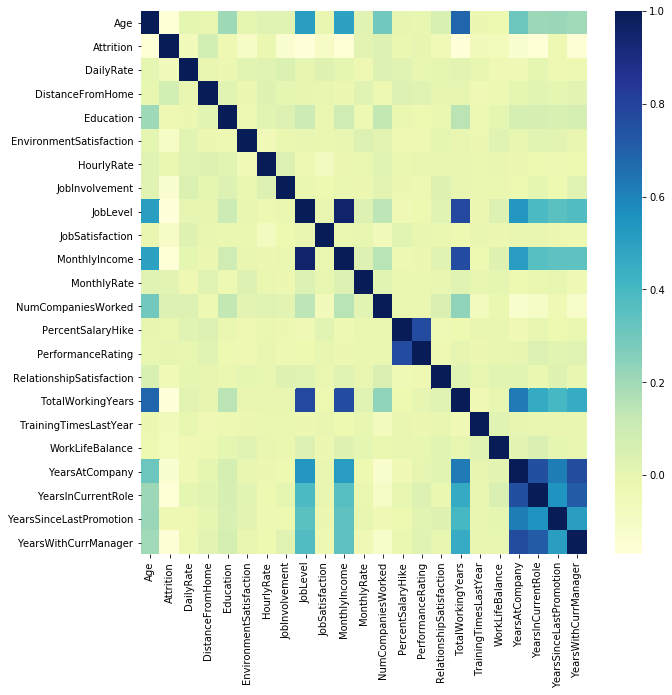

In [11]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='YlGnBu')
plt.show()

*Checking if any column contains null values*

In [12]:
#Summary based on Attrition
df=data.groupby('Attrition')
df.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,15.231144,3.153285,2.733982,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,15.097046,3.156118,2.599156,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


There are some numerical columns from which we can create categorical variables <br>
1) <b>DistanceFromHome</b><br>
   distance from office can be convrted to nearby, middistance and far<br>
2) <b>YearsInCurrentRole</b><br>
   Years in current role can be converted to short, medium and long<br>
similarly there are other columns <b>YearsWithCurrManager</b>, <b>YearsSinceLastPromotion</b>, <b>YearsAtCompany</b> etc<br>

In [13]:
def groupDistanceFromHome(data):
    if int(data) >=1 and int(data) <= 5:
        return 'NearBy'
    elif int(data) >=6 and int(data) <= 15:
        return 'MidDistance'
    else:
        return 'Far'

def groupYearsInCurrentRole(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'
    
def groupYearsWithCurrManager(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'

def groupYearsSinceLastPromotion(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'

def groupYearsAtCompany(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'
    
def groupTotalWorkingYears(data):
    if int(data) >=0 and int(data) <= 8:
        return 'short'
    elif int(data) >8 and int(data) <= 15:
        return 'medium'
    else:
        return 'long'

def groupPercentSalaryHike_by_rating(data):
    if int(data) == 3:
        return 'good'
    elif int(data) == 4:
        return 'better'
    else:
        return 'best'

def groupAverageWorkingYearInEachComp(data):
    if int(data) >= 0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'

def getAvgWorkingYearInEachComp(TotalWorkingYears, NumCompaniesWorked):
    if NumCompaniesWorked == 0:
        return TotalWorkingYears
    else:
        return TotalWorkingYears / NumCompaniesWorked

In [14]:
data['AverageWorkingYearInEachComp'] = data[['TotalWorkingYears', 'NumCompaniesWorked']].apply(lambda row: 
                                        getAvgWorkingYearInEachComp(row.TotalWorkingYears, row.NumCompaniesWorked), axis=1)
data['AverageWorkingYearInEachComp'] = data['AverageWorkingYearInEachComp'].astype(int)
data['AverageWorkingYearInEachComp'] = data['AverageWorkingYearInEachComp'].apply(lambda row:
                                        groupAverageWorkingYearInEachComp(row))
data['DistanceFromHome'] = data['DistanceFromHome'].apply(lambda row: groupDistanceFromHome(row))
data['YearsInCurrentRole'] = data['YearsInCurrentRole'].apply(lambda row: groupYearsInCurrentRole(row))
data['YearsWithCurrManager'] = data['YearsWithCurrManager'].apply(lambda row: groupYearsWithCurrManager(row))
data['YearsSinceLastPromotion'] = data['YearsSinceLastPromotion'].apply(lambda row: groupYearsSinceLastPromotion(row))
data['YearsAtCompany'] = data['YearsAtCompany'].apply(lambda row: groupYearsAtCompany(row))
data['TotalWorkingYears'] = data['TotalWorkingYears'].apply(lambda row: groupTotalWorkingYears(row))

In [15]:
data['MontlyIncomeByAge'] = data['MonthlyIncome'] / data['Age']
data['MontlyIncomeByAge'] = data['MontlyIncomeByAge'].astype(int)

In [16]:
data = data.drop(['EmployeeNumber', 'EmployeeCount','StandardHours', 'Over18'], axis=1)

KeyError: "['EmployeeNumber' 'EmployeeCount' 'StandardHours'] not found in axis"

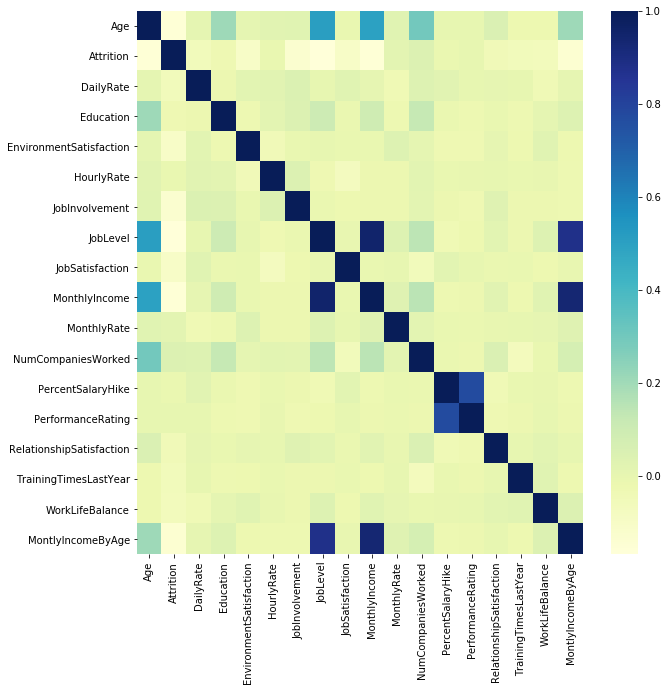

In [17]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='YlGnBu')
plt.show()

<b>Getting the categorical columns and numerical columns</b>

In [18]:
cat_columns =[]
for col, value in data.drop(['Attrition'], axis=1).iteritems():
    if value.dtype == 'object':
        cat_columns.append(col)
num_columns = data.drop(['Attrition'], axis=1).columns.difference(cat_columns)

In [19]:
print("categorical columns - %s" %(cat_columns))
print("")
print("numerical columns - %s" %(num_columns))

categorical columns - ['BusinessTravel', 'Department', 'DistanceFromHome', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AverageWorkingYearInEachComp']

numerical columns - Index(['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'MontlyIncomeByAge',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance'],
      dtype='object')


In [20]:
attrition_data = data['Attrition']
cat_data = data[cat_columns]
num_data = data[num_columns]

<b>Creating dummy variables for the categorical variables</b>

In [21]:
cat_data = pd.get_dummies(cat_data)

now concatenating the dummyvariables columns with numerical data and depandent variables

In [22]:
final_data = pd.concat([cat_data, num_data, attrition_data], axis=1)
final_data.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome_Far,DistanceFromHome_MidDistance,DistanceFromHome_NearBy,EducationField_Human Resources,...,MonthlyIncome,MonthlyRate,MontlyIncomeByAge,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,Attrition
0,0,0,1,0,0,1,0,0,1,0,...,5993,19479,146,8,11,3,1,0,1,1
1,0,1,0,0,1,0,0,1,0,0,...,5130,24907,104,1,23,4,4,3,3,0
2,0,0,1,0,1,0,0,0,1,0,...,2090,2396,56,6,15,3,2,3,3,1
3,0,1,0,0,1,0,0,0,1,0,...,2909,23159,88,1,11,3,3,3,3,0
4,0,0,1,0,1,0,0,0,1,0,...,3468,16632,128,9,12,3,4,3,3,0


<b>converting the data to train and test</b><br>
using the train_size as 0.7 and test_size as 0.3

In [23]:
train_data, test_data = train_test_split(final_data, train_size=0.7, test_size=0.3)

In [24]:
y_train = train_data['Attrition']
X_train = train_data.drop(['Attrition'], axis=1)
y_test = test_data['Attrition']
X_test = test_data.drop(['Attrition'], axis=1)

Normalizing the numerical values.<br>
<b>Why normalizing of data is required?</b><br>
It may happen some of the numerical columns contains outliers. To make our model robut and doesn't get impacted from the outliers we need to normalize the data.<br>

I am using the MinMaxScaler to normalize the numerical columns.

In [25]:
scaler = MinMaxScaler()
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

using the below code snippet i am getting the corr matrix and removing the one of columns for which the absolute value 
of corr is greater than 0.8 

In [26]:
corr_matrix = X_train_transformed.corr()
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.8:
            corr_features.add(corr_matrix.columns[i])
corr_features

{'Department_Sales',
 'Gender_Male',
 'JobRole_Human Resources',
 'MonthlyIncome',
 'MontlyIncomeByAge',
 'OverTime_Yes',
 'YearsSinceLastPromotion_short',
 'YearsWithCurrManager_short'}

In [27]:
# removing the columns for from the transformed data for which the value is greater than 0.8
X_train_transformed = X_train_transformed.drop(columns=list(corr_features), axis=1)

<b>Applying the LogisticRegression with rfecv to get the 10 top most features that lead to employee attrition</b><br>
Logistic Regression is used for <b>Binary Classification</b> and classify the data points to one of the two categories.<br><br>

<b><u>RFECV</u></b> - Recursive Feature Selection and Cross Validation Selection


In [28]:
log_reg = LogisticRegression()
rfe = RFECV(log_reg, cv=StratifiedKFold(5), scoring='neg_mean_squared_error', min_features_to_select=5)
rfe.fit(X_train_transformed, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=5, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [29]:
X_train_transformed = X_train_transformed.drop(X_train_transformed.columns[np.where(rfe.support_ == False)], axis=1)

In [30]:
important_cols = pd.DataFrame()
important_cols['Cols'] = X_train_transformed.columns
important_cols['Percent'] = rfe.estimator_.coef_[0]

In [31]:
important_cols = important_cols.sort_values(by='Percent', ascending=False)
important_cols

,Cols,Percent
11,YearsSinceLastPromotion_long,0.939204
8,MaritalStatus_Single,0.885189
6,JobRole_Laboratory Technician,0.874323
7,JobRole_Sales Representative,0.865437
5,EducationField_Technical Degree,0.837919
12,AverageWorkingYearInEachComp_short,0.818246
4,EducationField_Marketing,0.763090
2,DistanceFromHome_Far,0.753527
1,BusinessTravel_Travel_Frequently,0.746297
3,EducationField_Human Resources,0.739914


selecting the first 12 features and creating a Logistic Regression model using the same

In [32]:
### getting only the first 12 featues
X_train_10_imp_feature = X_train_transformed[important_cols['Cols'].values[0:12]]

In [33]:
log_reg.fit(X_train_10_imp_feature, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
X_test_transform = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [35]:
X_test_transform_required_cols = X_test_transform[X_train_10_imp_feature.columns]

In [36]:
y_test_pred = log_reg.predict(X_test_transform_required_cols)

In [37]:
metrics.accuracy_score(y_test_pred, y_test)

0.8412698412698413